<a href="https://colab.research.google.com/github/Kaiking28/Billboard-Charts-Sentiment-Analysis-2024/blob/main/class5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

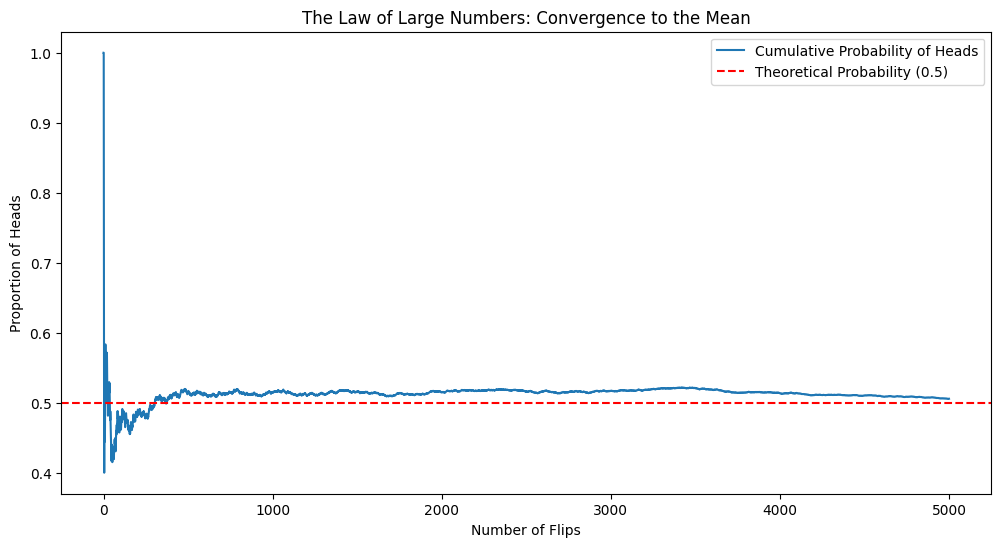

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [58]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.17%
Win Rate (Switch): 66.83%


Probability of Revenue Decline: 17.13%
95% Value at Risk (Worst Case): $9,629,434.27


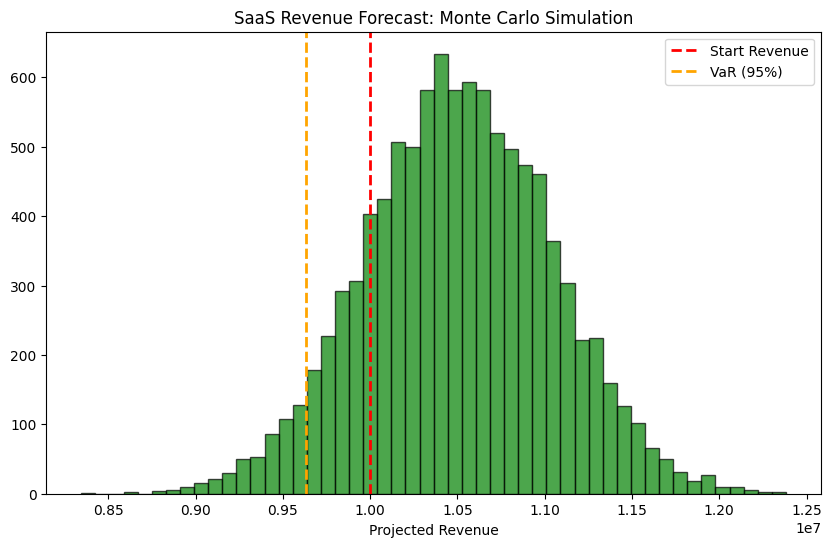

In [59]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

MODEL COMPARISON

NORMAL DISTRIBUTION MODEL:
  Probability of Revenue Decline: 0.1705
  95% Value at Risk: $9614567.653765908

FAT TAIL (t-distribution) MODEL:
  Probability of Revenue Decline: 0.2109
  95% Value at Risk: $9,289,607.24

DIFFERENCE:
  Risk Increase: 0.04039999999999999 percentage points
  VaR Difference: -324960.4121489357


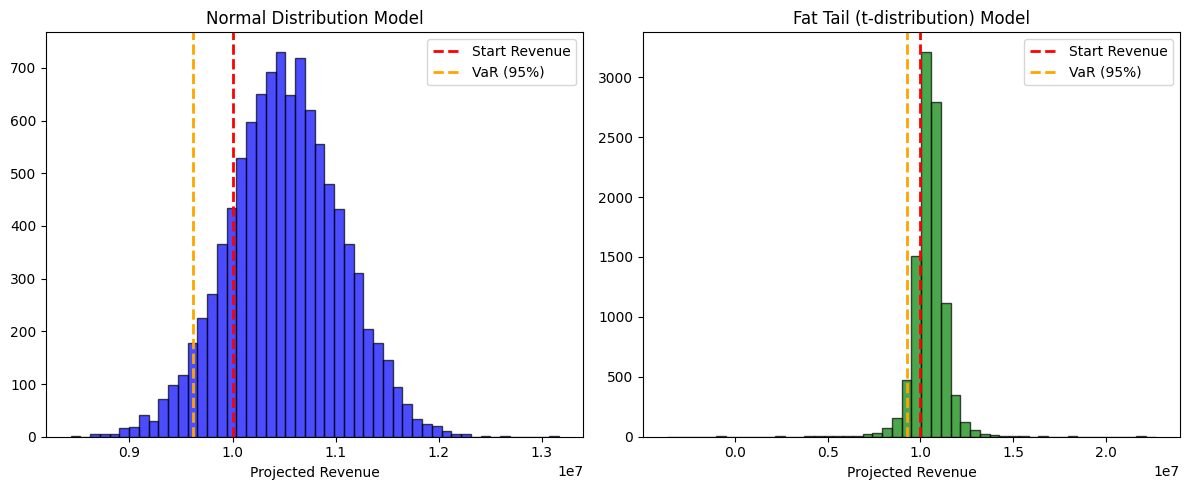

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    prob_loss = np.mean(net_revenue < base_rev)
    var_95 = np.percentile(net_revenue, 5)

    return net_revenue, prob_loss, var_95

def saas_risk_model_fat_tail(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    sales_sims = 1_500_000 + 500_000 * np.random.standard_t(df=3, size=n_sims)

    # The Transfer Function
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    prob_loss = np.mean(net_revenue < base_rev)
    var_95 = np.percentile(net_revenue, 5)

    return net_revenue, prob_loss, var_95

# Run both models
np.random.seed(42)
normal_rev, normal_prob, normal_var = saas_risk_model(10000)
fat_tail_rev, fat_prob, fat_var = saas_risk_model_fat_tail(10000)

# Print comparison
print("MODEL COMPARISON")
print(f"\nNORMAL DISTRIBUTION MODEL:")
print(f"  Probability of Revenue Decline: {normal_prob}")
print(f"  95% Value at Risk: ${normal_var}")
print(f"\nFAT TAIL (t-distribution) MODEL:")
print(f"  Probability of Revenue Decline: {fat_prob}")
print(f"  95% Value at Risk: ${fat_var:,.2f}")
print(f"\nDIFFERENCE:")
print(f"  Risk Increase: {(fat_prob - normal_prob)} percentage points")
print(f"  VaR Difference: {(fat_var - normal_var)}")

# Visualization
base_rev = 10_000_000

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(normal_rev, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
plt.axvline(normal_var, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
plt.title('Normal Distribution Model')
plt.xlabel('Projected Revenue')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(fat_tail_rev, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
plt.axvline(fat_var, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
plt.title('Fat Tail (t-distribution) Model')
plt.xlabel('Projected Revenue')
plt.legend()

plt.tight_layout()
plt.show()

The normal model shows 95 percent Var of 9,614,567 and 17.05 percent probability of revenue decline. The fat tail model shows 95 percent VaR of 9,289,607 and 21.09 percent probability of decline. The difference is 324,960 in worse downside exposure and 4 percentage points higher risk.

Fat tail distributions capture real sales behavior better than normal distributions. Sales data shows extreme outcomes occur more frequently than normal curves predict. Big pipeline wins and catastrophic losses both happen more often in practice.

Our current reserves underestimate risk by 325,000. We need 400,000 to 500,000 in additional capital reserves to cover the tail risk that normal distributions miss.